Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 1 </h2>
    <h1> Mobile Price </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 4 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn import (preprocessing, decomposition, neighbors, model_selection) 



Introduccion

El dataset utilizado es Mobile Price. Este conjunto de datos refleja una serie de características propias de un teléfono móvil.

A continuación, se presentan las variables que están contenidas:

* battery_power: Capacidad de la batería.

* blue: Tiene bluetooth o no.

* clock_speed: Frecuencia del procesador.

* dual_sim: Tiene dual sim o no.

* fc: Megapixeles de la cámara frontal.

* four_g: Tiene 4G o no.

* int_memory: Memoria interna.

* m_dep: Profundidad del teléfono.

* mobile_wt: Peso del teléfono.

* n_cores: Número de procesadores.

* pc: Megapixeles de la cámara trasera.

* px_height: Cantidad de pixeles (alto)

* px_width: Cantidad de pixeles (ancho)

* ram: Memoria RAM

* sc_h: Altura de la pantalla.

* sc_w: Ancho de la pantalla.

* talk_time: Duración de la batería.

* three_g: Tiene 3G o no.

* touch_screen: Tiene pantalla táctil o no.

* wifi: Tiene WIFI o no.

* price_range: Rango de precios (0: low cost, 1: medium cost, 2: high cost y 3: very high cost)




# Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (3 puntos)

Cargue el dataset Mobile Price dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos?

RESPUESTA:

In [3]:
# Cambie el nombre del archivo csv como 'mobile-price-dataset-csv' por comodidad para trabajar sin espacios 😅
import pandas as pd
X = pd.read_csv('mobile-price-dataset.csv', sep=',')

In [4]:
print(f'Numero de filas: {X.shape[0]}')
print(f'Numero de columnas: {X.shape[1]}')



Numero de filas: 2000
Numero de columnas: 21


In [5]:
X[X.isnull().any(axis=1)]
# No existen datos nulos en el dataset, dado que no retorna ninguna tupla (fila) con elementos nulos. 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


## 1.2 Describir dataset (9 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las variables:

* battery_power
* ram
* fc
* price_range

Luego, use gráficos y medidas descriptivas para reflejar la relación existente entre cada variable cuantitativa y el nivel de precios (price_range). Comente.

RESPUESTA:

Primero definiremos los atributos del data y lo guardaremos en una variable llamada 'feature_names'. Luego, crearemos la funcion, la cual nos permitira entender la frecuencia de cada valor que tome la variable a partir de un histograma. Ademas, describiremos cada variable obteniendo diferentes medidas descriptivas, como cuartiles y percentiles.

In [6]:
feature_names = X.columns.tolist() # Guardamos cada variable en una lista para poder graficar
feature_mapping = {
    'battery_power' : 'Capacidad de la bateria',
    'ram' : 'RAM Memory',
    'fc' : 'Megapixels frontal camera',
    'price_range' : 'Price range'
}

In [7]:
def plot_hist(feature): # Funcion que realiza un histograma sin escalamiento 
    X_ = X[feature].tolist()
    title = feature
    xlabel = feature_mapping[feature]
    x, bins, patches = plt.hist(x=X_, color='green', bins='auto', rwidth=0.3)
    plt.grid(axis='y')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

### Battery Power

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

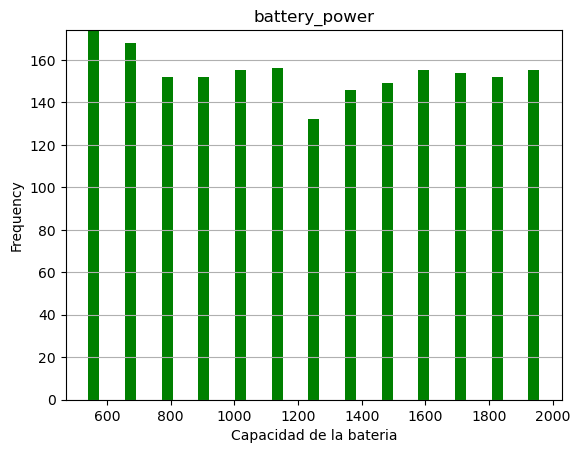

In [8]:
plot_hist('battery_power')
X['battery_power'].describe(include='all')


Por ejemplo, si asumimos que la capacidad de bateria es de amperios-hora, dado el grafico podemos notar que existe una cantidad _equitativa_ de celulares con respecto a la capacidad de carga que presentan (existen 2000 celulares en total). Es decir, por ejemplo, aproximadamente existen 160 celulares con una capacidad de carga entre 500 y 600 (Ah), y entre 150-160 celulares con una capacidad de carga cercana a 2000 (Ah). Por otra parte, podemos notar que el 50% de los celulares contienen una capacidad de carga de 1226 Ah y un promedio de 1238 Ah. 

### Memory RAM

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

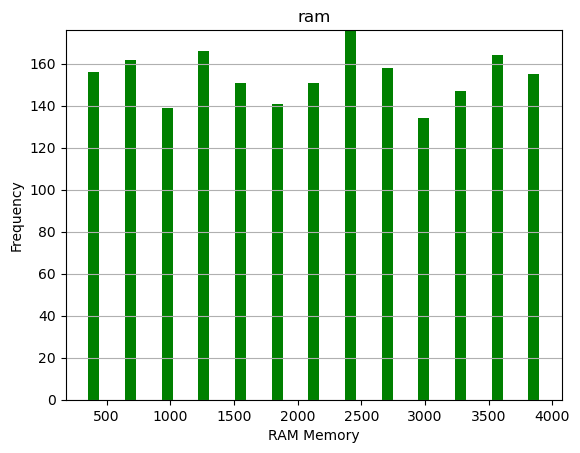

In [9]:
plot_hist('ram')
X['ram'].describe(include='all')

Al igual que la bateria, existe una cantidad _balanceada_ de celulares que contienen una cantidad diferente de memoria RAM. Por ejemplo, no es mucha la diferencia entre la cantidad de celulares que tienen cerca de 500 memoria de RAM y 3500 de RAM. Asimismo, dada las medidas descriptivas, podemos notar que sobre el 50% de los celulares contienen una memoria de RAM de 2146, y en promedio es de 2124 de RAM. 

### Megapixels frontal camera

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

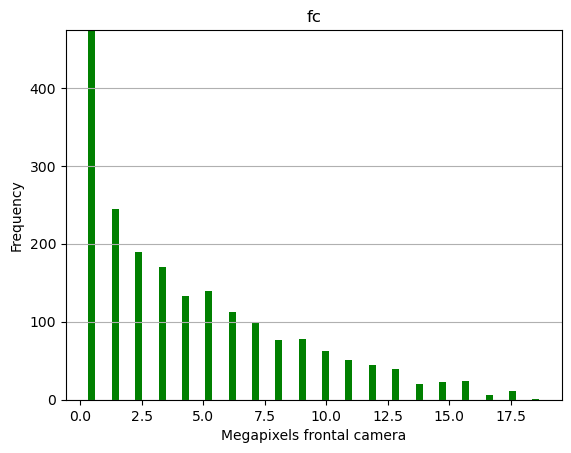

In [10]:
plot_hist('fc')
X['fc'].describe(include='all')

Dado el grafico anterior, podemos notar que dentro del set de datos existen celulares con baja resolucion de camara, ya que existe una gran cantidad de celulares superior al resto que contiene alrededor de 0 a 2.5 megapixeles en la camara frontal. Ademas, tambien existen pocos celulares una camara de alta resolucion, ya que sobre el 75% de los celulares contienen 7MP, siendo que el maximo de megapixeles alcanzados es de 19MP. 

### Price Range

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

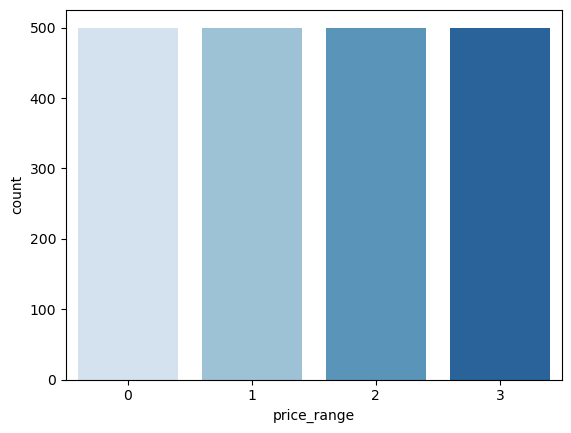

In [11]:
# En el caso del rango de precios, utilizaremos un grafico de conteo para mejor visualizacion de los datos
sns.countplot(data=X, x='price_range', palette='Blues')
X['price_range'].describe(include='all')

Dado el grafico, podemos notar que existe una cantidad exactamente igual de celulares que son valorizados por ser muy baratos, ni barato ni caro, caro, y muy caro. 
- Low cost: 500 celulares
- Medium cost: 500 celulares
- High cost: 500 celulares
- Very high cost: 500 celulares

### Relacion entre Precio-RAM, Precio-FC, y Precio-BatteryPower

Para la representacion entre el rango de precios y el resto de variables utilizaremos un diagrama de cajas con el fin de analizar profundamente como se comporta los valores que toma cada variable en funcion de las categorias del precio. Asimismo, utilizaremos percentiles para analizar la distribucion de los celulares (segun su capacidad de bateria, ram y megapixeles) con respecto al rango de precio que son clasificados. 

In [12]:
def box_plot(feature): # Grafico que ilustra 4 diagramas de cajas (categorizados segun el rango de precios) en relacion a la variable que compararemos. 
    sns.boxplot(x = 'price_range', y = feature, data = X, palette = 'Set2')
    plt.xlabel('Rango de precios - 0 = Low Cost / 1 = Medium Cost / 2 = High Cost / 3 = Very High Cost')
    plt.title(f'Grafico de relacion Rango de precio y {feature_mapping[feature]}')
    plt.ylabel(feature)
    plt.show()

#### Diagramas de cajas de Capacidad de carga / RAM / Megapixeles, en funcion al rango de precio 

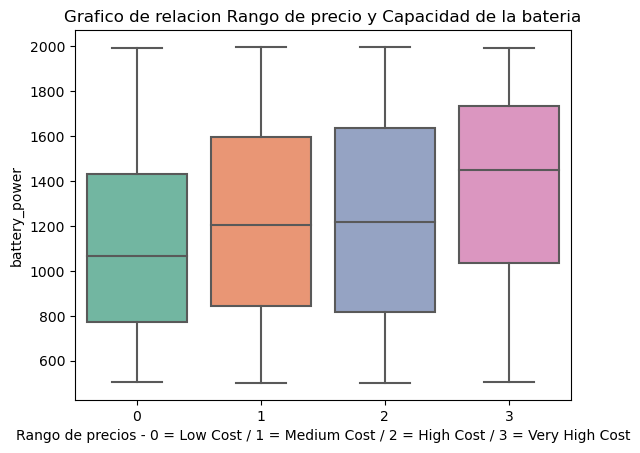

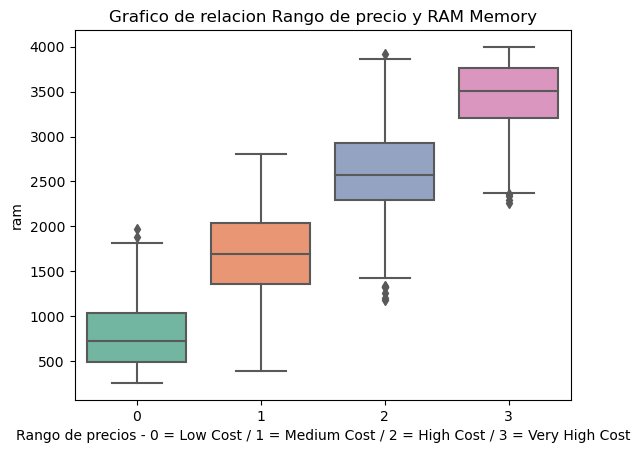

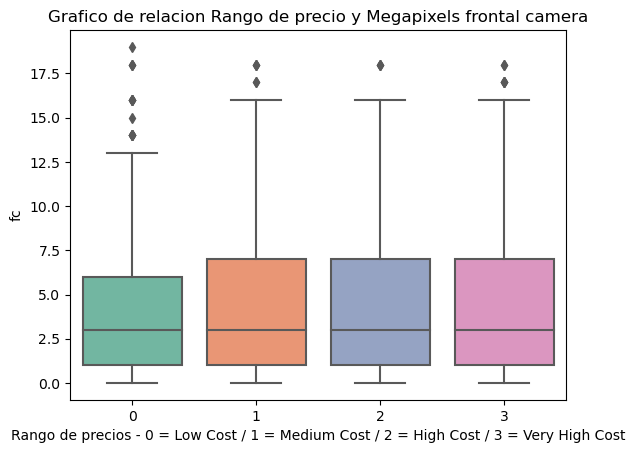

In [13]:
box_plot('battery_power')
box_plot('ram')
box_plot('fc')

Podemos notar que para la capacidad de bateria y la RAM de cada celular esta directamente relacionado segun que tan caro sea el celular. En este sentido, si el celular tiene un precio barato, entonces tanto la capacidad de bateria como la memoria RAM será baja. Mientras que para el caso de los megapixeles de la camara frontal, el precio no es muy influyente. 

Especificamente, podemos analizar que:
* Para la capacidad de carga, podemos notar que sobre el 50% de los celulares baratos tienen una capacidad de bateria entre 1000 y 1200 Ah. Mientras que para los celulares muy caros esta capacidad es cercana a los 1400. 
* Para la memoria RAM, se ve una _extremada_ diferencia en relacion al precio. Mas del 50% de los celulares caros tienen una memoria RAM de 3500. Mientras que sobre el 50% de los mas baratos es de  750 aproximadamente. 
* Para los megapixeles de la camara frontal, sobre el 50% de los celulares que clasifica en cualquier categoria de precio, contiene aproximadamente 2.5 MP. 


## 1.3 Normalizar datos (8 puntos)

Realice un proceso de normalización, considerando **SOLO** las siguientes variables:

* 'battery_power',
* 'clock_speed',
* 'fc',
* 'int_memory',
* 'm_dep',
* 'mobile_wt',
* 'n_cores',
* 'pc',
* 'px_height',
* 'px_width',
* 'ram',
* 'sc_h',
* 'sc_w',
* 'talk_time'


Explique por qué es útil realizar esta acción.

RESPUESTA:

In [14]:
columns_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
scaler = preprocessing.MinMaxScaler()
X_ = scaler.fit_transform(X[columns_names]) # Realizamos un escalamiento para solo los atributos de 'columns_names'

Al Realizar una normalizacion de datos, como es en el caso de un escalamiento, nos permite definir un intervalo de valor igual para todas las variables, por lo que asi es mas facil poder comparar entre variables con dominios distintos. MinMaxScaler es un tipo de normalizacion que nos permite transformar cada caracteristica dentro de un intervalo comun. 

### Bonus: Investigar medida de asociación lineal (3 décimas)

Investigue una medida de asociación lineal entre variables cuantitativas. Describa sus principales características, poniendo énfasis en la interpretación de sus resultados. Luego, calcule la medida respectiva para los datos cuantitativos ya normalizados en el punto 1.3. ¿Qué variables tienen la mayor relación?

RESPUESTA:

**Coefficiente de correlacion de Pearson**

Para analizar el grado de asociacion lineal entre variables cuantitativas utilizaremos el _coeficiente de correlacion de Pearson (r)_. El coeficiente de correlacion de Pearson es una medida de correlacion lineal que permite describir el grado de asociacion entre pares de variables. El valor de este coeficiente puede tomar un rango de valor entre -1 y 1. 
$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2  \sum_{i=1}^{n}(y_i - \overline{y})^2}}$$

* Si $-1 <= r < 0$, entonces la relacion entre dos variables es opuesta, es decir, si una variable cambia en una direccion, el valor de la otra variable camnbia en la direccion opuesta (correlacion negativa fuerte). 
* Si $r = 0$, entonces la relacion entre las dos bariables es nula. 
* Si $0 < r <= 1$, entonces la relacion entre dos variables es fuerte (correlacion positiva fuerte), es decir, ambas variables cambian de valores en la misma dirección. 

En este sentido, para el dataset normalizado anterior, podemos utilizar esta herramienta para poder visualizar que variables tienen mayor grado de asociacion

In [15]:
df_X_ = pd.DataFrame(X_, columns = columns_names) # Transformamos el numpy array a un dataframe

In [16]:
df_X_.corr() # Sacamos la correlacion entre todos los atributos 

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


Considerando el valor que toma el coeficiente de correlacion, podemos identificar que los megapixeles de la **camara frontal (fc)** y los megapixeles de la **camara trasera (pc)** tienen el grado de asociacion mas alto, con un valor de **0.644595**. Esto implica que, a mayor cantidad de MP de la camara frontal del celular, entonces tendremos mas cantidad de MP en la camara trasera. 


# Parte 2: Reducción de dimensionalidad (15 puntos)

En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con **Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza en función del número de componentes. Comente.

RESPUESTA:

In [17]:
X_.shape

(2000, 14)

In [18]:
pca = decomposition.PCA(n_components = 14) # La cantidad de componentes sera la minima entre 14 y 2000 --> 14
pca.fit(X_)

PCA(n_components=14)

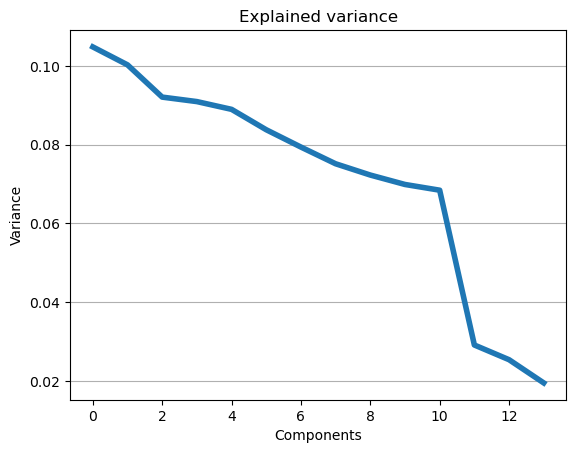

In [19]:
# grafico de la varianza explicada
def plot_var_curve(X): 
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')
plot_var_curve(pca.explained_variance_ratio_)


Podemos notar que en la componente 9, la varianza tiene una pendiente que tiende a ser horizontal, por lo que en este codo podemos inferir que hasta los 10 o 11 componentes podemos captar una cantidad importante de informacion del set de datos. Despues de los 11 componentes, existe una pendiente negativa 'drastica'. En este sentido,podemos decir que desde la componente 11 en adelante no se presenta una mayor varianza, y no retiene de manera significativa la informacion. 
Tambien podemos notar que existe un codo para la componente 2, ya que la varianza se mantiene casi constante. 
Por lo tanto, podemos elegir alguna de los 2 codos identificados (2 o 11) para reducir la dimensionalidad sin perder informacion significativa y capturar la mayor cantidad de varianza posible.


### 2.2 Retener 90% de la varianza (5 puntos)

PCA debe retener un 90% de la varianza de los datos originales. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

In [20]:
def min_var(v,exp_var): # captamos cuantas componentes necesito para retener el 90% de la varianza del dataset
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i
min_var(0.9, pca.explained_variance_ratio_)

11

Se necesitan 11 componentes necesarios para reducir la dimensionalidad sin perder informacion significativa.  🚀

### 2.3 Reducir dimensionalidad a n=6 (5 puntos)

PCA debe construirse con dimensionalidad n=6. Determine la proporción de varianza explicada.

RESPUESTA:

In [31]:
# Obtenemos la varianza explicada para cada componente, considerando la construccion del PCA con dimensionalidad n=6.
pca_2 = decomposition.PCA(n_components = 6)
pca_2.fit(X_)
# Como el atributo explained_variance_ nos retorna un arreglo con la cantidad de varianza explicada por cada componente, 
# entonces asumi que la proporcion total de varianza explicada seria la suma de este arreglo. Es decir: 
sum(pca_2.explained_variance_)
# Por lo tanto, la proporcion de varianza explicada para un PCA con n=6 es de 0.661, aproximadamente.

0.6610385338609344

Del resultado anterior podemos inferir que si la proporcion total de varianza explicada es de 0.661, entonces podemos decir que existe un 66,1% de variabilidad dentro de los datos que estan siendo explicados con 6 componentes. 

## Parte 3: Detección de outliers (10 puntos)

En esta tercera parte se debe evaluar la existencia de outliers en el conjunto de datos que solo contiene variables cuantitativas. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza).

In [32]:
"""
Antes de empezar, ajustaremos la cantidad de componentes necesarias dentro del set de datos normalizados en el punto 1.3.
Para ello, reduciremos la dimensionalidad necesaria con solamente 11 componentes, segun lo obtenido en el punto 2.2. 
"""
pca_3 = decomposition.PCA(n_components = 11)
X_reduced = pca_3.fit_transform(X_)
X_reduced.shape

(2000, 11)

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

In [33]:
# Definimos la funcion que realizara el histograma de puntajes LOF
def plot_hist_lof(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', color="orange", rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

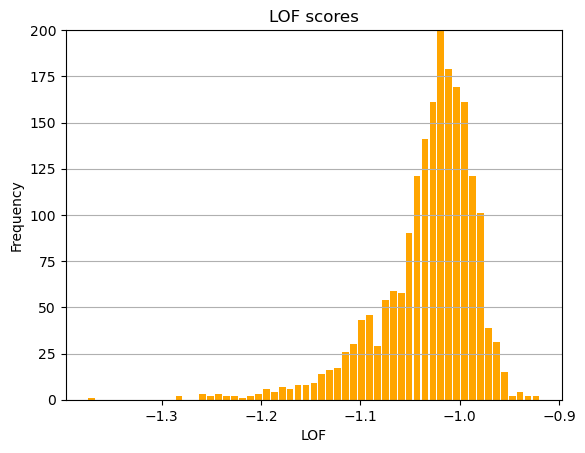

In [34]:
lof = neighbors.LocalOutlierFactor(n_neighbors = 5, metric = 'euclidean')
lof.fit_predict(X_reduced)
scores = lof.negative_outlier_factor_
plot_hist_lof(scores, 'LOF scores') # Obtenemos el histograma

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1,15, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

In [35]:
# Definiremos la siguiente funcion lof_threshold, la cual entrega la proporcion de datos que corresponden a outliers. 
# Dado un umbral de corte, los datos que se encuentren despues de este valor, seran considerados como outliers. 
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold
lof_threshold(-1.15, scores)

0.03

Dado el resultado anterior, podemos afirmar que existen un 3% de datos del total que son considerados como outliers, para un umbral de corte igual a -1,15. 
Es decir, la contaminacion del medio es de un 3%

In [152]:
# Ahora eliminaremos los outliers del set de datos, definiendo nuevamente la variable lof pero considerando una contaminacion del medio de un 0.03
lof = neighbors.LocalOutlierFactor(n_neighbors = 5, metric = 'euclidean', contamination=0.03)
labels = lof.fit_predict(X_reduced)

In [37]:
X_cleaned = X_reduced[np.where(labels==1)]

In [38]:
X_cleaned.shape

(1940, 11)

Definimos como *X_cleaned* la variable que guardara solo los datos inliers. Como los outliers (o _datos atipicos_) se consideran el 3% del total, estos serian 60 de 2000 datos en total, por lo que nos quedamos con 1940 datos de nuestra muestra de datos. 


## Parte 4: Clasificación (15 puntos)

En esta última sección debe entrenar un clasificador basado en k-nearest neighbors. Para ello, debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.

### 4.1 Separar train y test (4 puntos)

Tomando en consideración el resultado del punto 3.2, separe el conjunto de datos en train (75%) y test (25%). Utilice **price_range** como variable de respuesta (y).

Luego, para y_train e y_test, determine la cantidad de elementos de cada clase.

**Observación:**

Para trabajar con la variable **price_range**, debe eliminar los registros clasificados como atípicos en el dataset original de Mobile Price. Considere que la dimensión del vector **price_range** debe coincidir con el número de filas del conjunto de datos del punto 3.2.

RESPUESTA:

In [165]:
# Definimos el vector price_range 
y = X['price_range'].values
# Luego eliminamos los outliers en base a los indices obtenidos
index = list(np.where(labels==1)[0])
y = y[index,]
print(y.shape) # Ajustamos la dimension de la variable de respuesta acorde a la dimension de X_cleaned
print(X_cleaned.shape) 


(1940,)
(1940, 11)


In [166]:
# Ahora separaremos el conjunto de datos en train 75% y test 25% utilizando como variable de respuesta el vector de price_range
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_cleaned, y, test_size = 0.25)

In [175]:
print(set(y_train))
print(set(y_test))
# Como podemos notar, presentamos cuatro clases principales para el vector price_range {0, 1, 2, 3}, por lo tanto
# crearemos un diccionario para cada una y contaremos la cantidad de elemento para cada clase. 

{0, 1, 2, 3}
{0, 1, 2, 3}


In [ ]:
classes_y_train = {0 : 0, 1 : 0, 2 : 0, 3 : 0}
classes_y_test = {0 : 0, 1 : 0, 2 : 0, 3 : 0}


### 4.2 Aplicar clasificador KNeighborsClassifier (7 puntos)

Determine el número de vecinos entre los siguientes valores: 2, 3, 4, 5, 6 y 7. Considere la métrica score para tomar la decisión.

RESPUESTA:

### 4.3 Evaluar clasificador por clase (4 puntos)

Utilizando el mejor clasificador, identificado en el punto 4.2, evalúe el rendimiento por clase.

RESPUESTA: